In [3]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [10]:
"""
https://help.aliyun.com/document_detail/155004.htm
表情识别
"""

from aliyunsdkfacebody.request.v20191230.RecognizeExpressionRequest import RecognizeExpressionRequest

request = RecognizeExpressionRequest()
request.set_accept_format('json')

filepath="images/大笑.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': 'AD9061EA-17FF-5333-A880-99F2972EC9F8', 'Data': {'Elements': [{'Expression': 'happiness', 'FaceRectangle': {'Left': 105, 'Top': 40, 'Height': 81, 'Width': 68}, 'FaceProbability': 0.9949304461479187}]}}


In [ ]:
"""
Expression	String	surprise	
表情类别。枚举类型：neutral、happiness、surprise、sadness、anger、disgust、fear。

FaceProbability	Float	0.99651491641998291	
检测结果的概率，取值范围为0~1。

"""

In [15]:
Data=response["Data"]["Elements"][0]
Data


{'Expression': 'happiness',
 'FaceRectangle': {'Left': 105, 'Top': 40, 'Height': 81, 'Width': 68},
 'FaceProbability': 0.9949304461479187}

In [17]:
Expression=Data["Expression"]
Expression

'happiness'

In [19]:

FaceRectangle=Data["FaceRectangle"]
FaceRectangle

{'Left': 105, 'Top': 40, 'Height': 81, 'Width': 68}

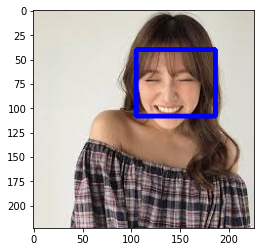

In [21]:
FaceRectangle=Data["FaceRectangle"]
 # 返回人脸矩形框，分别是[left, top, width, height]。如有多个人脸，则依次顺延，返回矩形框。例如有两个人脸则返回
# [left1, top1, width1, height1, left2, top2, width2, height2]
left=FaceRectangle['Left']
top=FaceRectangle['Top']
width=FaceRectangle['Height']
height=FaceRectangle['Width']
img=plt.imread(filepath)
res=cv2.rectangle(img,(left,top), (left+width,top+height),(0,0,255), 4)
plt.imshow(res)